In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
file_path = "Downloads/train.csv/taxi dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0           9.01          1                  N             1         26.0   
1           0.20          1                  N             1          3.0   
2           9.65          1                  N             1         41.5   
3           9.50          1                  N             1         30.0   
4           5.80          1                  N             1         21.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0      0.5        8.14          5.76            0.3         40.70   
1    0.0      0.5        0.75          0.00            0.3          4.55   
2    0.0      0.5        9.61          5.76            0.3         57.67   
3    0.5      0.5        9.25          5.76            0.3         46.31   
4    0.5      0.5        4.56          0.00            0.3         27.36   

   pickup_location_id  dropoff_location_id  year  month  day  day_of_week  \
0  

In [13]:
# Convert to datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['hour_of_day'], unit='h')

# Set index
df.set_index('datetime', inplace=True)

# Resample to daily total fares
df_daily = df[['total_amount']].resample('D').sum()

C:\Users\HDC0422279\AppData\Local\Temp\ipykernel_4540\1577557542.py:4: FutureWarning: The provided callable <function sum at 0x000001CB63E9AD40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df.pivot_table(values='total_amount', index='day_of_week', columns='hour', aggfunc=np.sum)


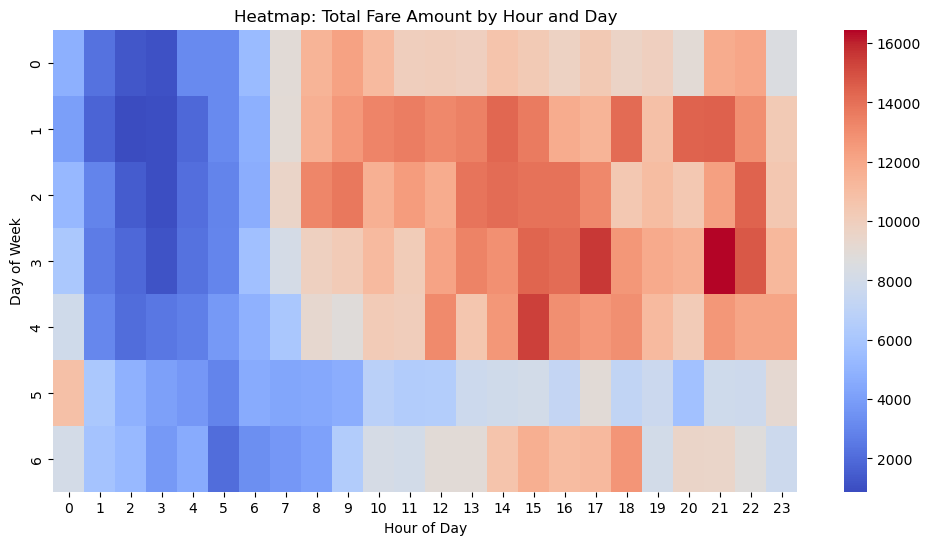

In [15]:
## 1. Heatmap (Fare Trends by Hour and Day)
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['hour'] = df.index.hour
pivot_table = df.pivot_table(values='total_amount', index='day_of_week', columns='hour', aggfunc=np.sum)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title("Heatmap: Total Fare Amount by Hour and Day")
plt.show()

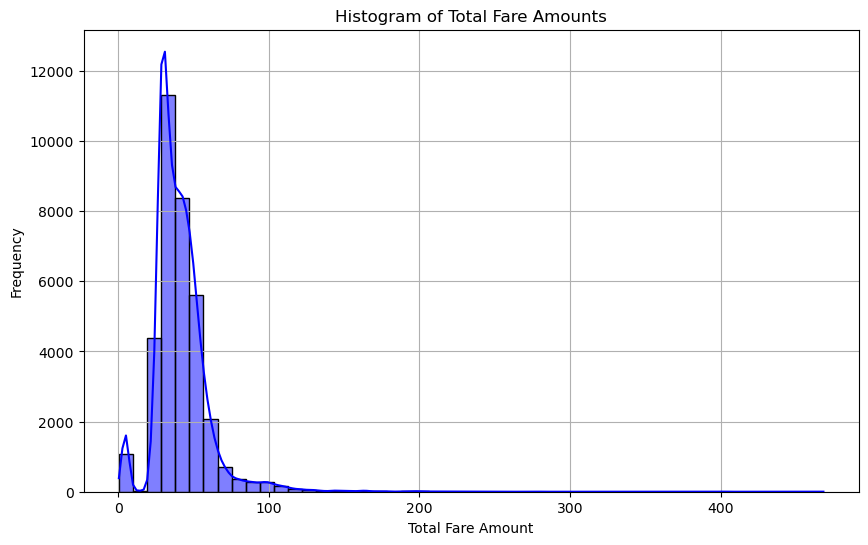

In [16]:
## 2. Histogram (Fare Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True, color='blue')
plt.xlabel("Total Fare Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Total Fare Amounts")
plt.grid()
plt.show()

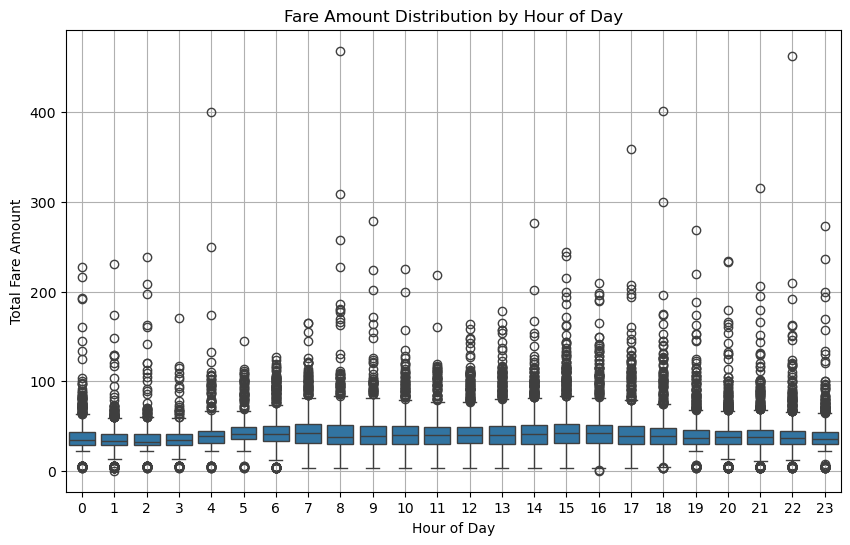

In [17]:
# 3. Hourly Fare Distribution (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hour_of_day'], y=df['total_amount'])
plt.xlabel("Hour of Day")
plt.ylabel("Total Fare Amount")
plt.title("Fare Amount Distribution by Hour of Day")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

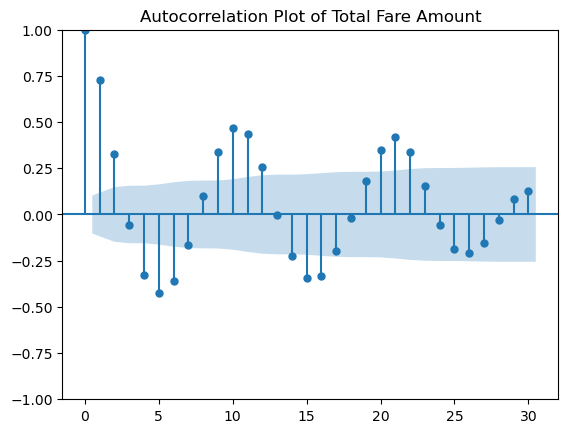

In [18]:
## 4. Autocorrelation Plot (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df_daily['total_amount'].dropna(), lags=30)
plt.title("Autocorrelation Plot of Total Fare Amount")
plt.show()

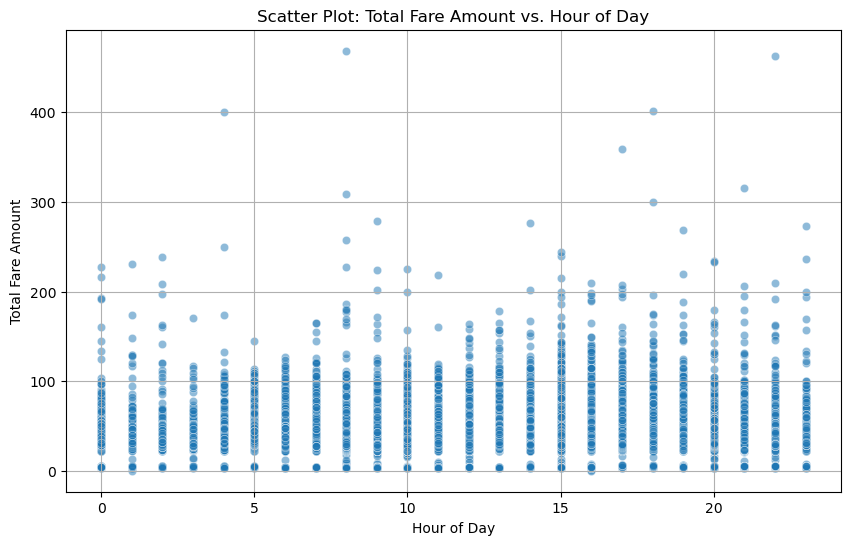

In [19]:
## 5. Scatter Plot (Fare vs. Hour)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['hour_of_day'], y=df['total_amount'], alpha=0.5)
plt.xlabel("Hour of Day")
plt.ylabel("Total Fare Amount")
plt.title("Scatter Plot: Total Fare Amount vs. Hour of Day")
plt.grid()
plt.show()